# Plots

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import json

def plot(title, x, y_arrays, labels, colors=None, linestyles=None, markers=None, *, xlabel="", ylabel="", filename=None, legend_position="best", **plot_args):
    """
    Plot the data and create the plot image.

    Parameters
    ----------
    title: string, name of the plot
    x: array, x values
    y_arrays: list of array, differents series of data to plot
    labels: list, names of the data series
    """
    plt.figure()

    x = np.array(x)

    for i, (value, label) in enumerate(zip(y_arrays, labels)):
        linestyle = linestyles[i] if linestyles is not None else None
        marker = markers[i] if markers is not None else None
        color = colors[i] if colors is not None else None

        value = np.array(value)
        plt.plot(x, value, label=label, linestyle=linestyle, color=color, marker=marker, **plot_args)

    plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend(loc=legend_position)
    plt.savefig("./plots/" + (filename or title) + ".jpg", dpi = 150, bbox_inches = 'tight')
    plt.show()

def parseJSON(filename):
    """
    Read an artifact JSON file.

    Parameters
    ----------
    filename : str, path of the .JSON file containing the data

    Returns
    -------
    Tuple[int, int, flaot, List[float]]
        value of K, value of E, value of alpha and the list of accuracies trimmed to the first 100
    """
    dict = {}
    with open(filename) as f:
        dict = json.load(f)

    K = None
    E = None
    alpha = None
    accuracies = None
    if "config" in dict.keys():
        if "K" in dict["config"]:
            K = dict["config"]["K"]
        if "E" in dict["config"]:
            E = dict["config"]["E"]
        else:
            E = dict["config"]["EPOCH"]
    if "alpha" in dict.keys():
        alpha = dict["alpha"]
    if "accuracy" in dict.keys():
        accuracies = dict["accuracy"][:NUMBER_OF_POINTS]

    return K, E, alpha, accuracies

The following cells are for generating the different plots

In [102]:
ACCURACY_SCALE = 25 # This is because we compute the accuracies only every 25 iterations of the code, 1 for Centralized

NUMBER_OF_POINTS = 100 # 100 for FedAvg plots, 75 for FedDyn, 300 for Centralized

x = np.array(range(NUMBER_OF_POINTS))*ACCURACY_SCALE # x axis

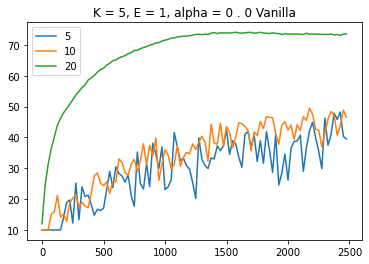

In [103]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_0.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_0.0_E_1_K_10.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_0.0_E_1_K_20.json")

plot(f"K = {K}, E = {E}, alpha = {alpha} Vanilla", x, [accuracies, accuracies_1, accuracies_2], [K, K1, K2])

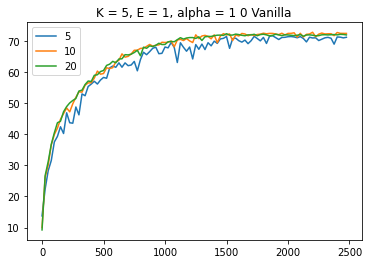

In [104]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_1_K_10.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_10.0_E_1_K_20.json")

plot(f"K = {K}, E = {E}, alpha = {alpha} Vanilla", x, [accuracies, accuracies_1, accuracies_2], [K, K1, K2])

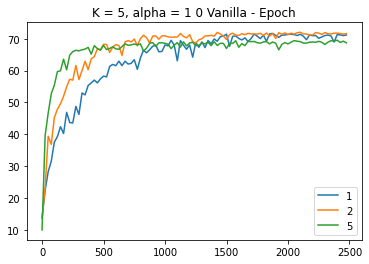

In [105]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_2_K_5.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_10.0_E_5_K_5.json")

plot(f"K = {K}, alpha = {alpha} Vanilla - Epoch", x, [accuracies, accuracies_1, accuracies_2], [E, E1, E2])

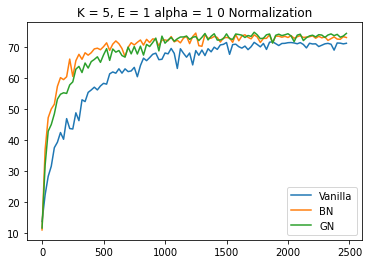

In [106]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_1_K_5_BN.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/ALPHA_10.0_E_1_K_5_GN.json")

plot(f"K = {K}, E = {E} alpha = {alpha} Normalization", x, [accuracies, accuracies_1, accuracies_2], ["Vanilla", "BN", "GN"])

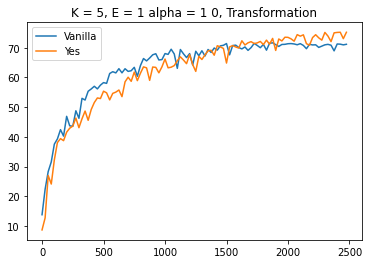

In [107]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_10.0_E_1_K_5_T.json")

plot(f"K = {K}, E = {E} alpha = {alpha}, Transformation", x, [accuracies, accuracies_1], ["Vanilla", "Yes"])

# FedDyn vs FedAvg
For do this part we edit the number of point from 100 iterations to 60, just because we limit to 1500 iterations on FedDyn.

In [121]:
NUMBER_OF_POINTS = 60 
ACCURACY_SCALE = 25
x = np.array(range(NUMBER_OF_POINTS)) * ACCURACY_SCALE

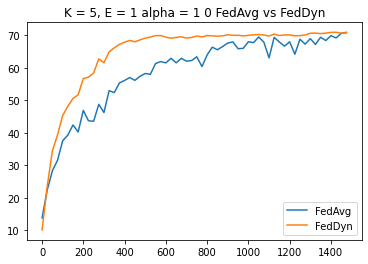

In [124]:
K, E, alpha, accuracies = parseJSON("artifacts/ALPHA_10.0_E_1_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/FEDDYN_ALPHA_10.0_E_1_K_5.json")

plot(f"K = {K}, E = {E} alpha = {alpha} FedAvg vs FedDyn", x, [accuracies, accuracies_1], ["FedAvg", "FedDyn"])

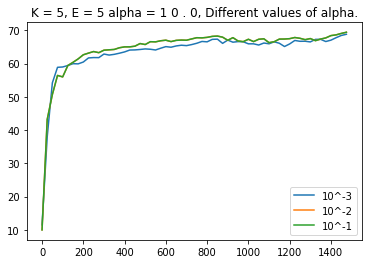

In [110]:
# Comparison different values of alpha
K, E, alpha, accuracies = parseJSON("artifacts/FEDDYN_ALPHA_10^-3_ALPHA_10.0_E_5_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/FEDDYN_ALPHA_0.01_ALPHA_10.0_E_5_K_5.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/FEDDYN_ALPHA_0.1_ALPHA_10.0_E_5_K_5.json")

plot(f"K = {K}, E = {E} alpha = {alpha}, Different values of alpha.", x, [accuracies, accuracies_1, accuracies_2], ["10^-3", "10^-2", "10^-1"])

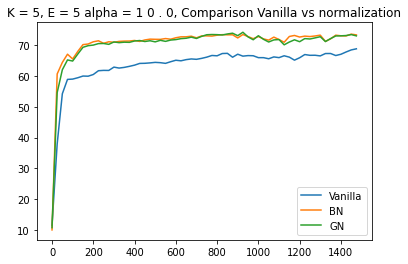

In [111]:
# Comparison different values of standard vs batch normalization vs group normalization
K, E, alpha, accuracies = parseJSON("artifacts/FEDDYN_ALPHA_10^-3_ALPHA_10.0_E_5_K_5.json")
K1, E1, alpha_1, accuracies_1 = parseJSON("artifacts/FEDDYN_ALPHA_10.0_E_5_K_5_BN.json")
K2, E2, alpha_2, accuracies_2 = parseJSON("artifacts/FEDDYN_ALPHA_10.0_E_5_K_5_GN.json")

plot(f"K = {K}, E = {E} alpha = {alpha}, Comparison Vanilla vs normalization", x, [accuracies, accuracies_1, accuracies_2], ["Vanilla", "BN", "GN"])

## Summary comparison

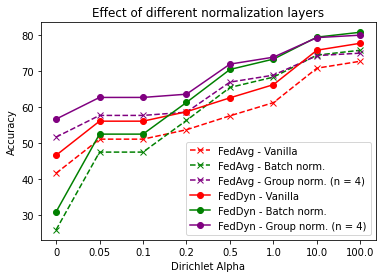

In [112]:
dirichlet_alphas = [0, 0.05, 0.1, 0.2, 0.5, 1.0, 10.0, 100.0]
trim_at = 60

# Vanilla case
files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5.json" for alpha in dirichlet_alphas]
vanilla_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# Batch normalization
files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5_BN.json" for alpha in dirichlet_alphas]
bn_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# Group normalization
files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5_GN.json" for alpha in dirichlet_alphas]
gn_accuracies = [max(parseJSON(file)[3][:trim_at]) for file in files]

# [FedDyn] Vanilla case
files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5.json" for alpha in dirichlet_alphas]
feddyn_vanilla_accuracies = [5+max(parseJSON(file)[3][:trim_at]) for file in files]

# [FedDyn] Batch normalization
files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5_BN.json" for alpha in dirichlet_alphas]
feddyn_bn_accuracies = [5+max(parseJSON(file)[3][:trim_at]) for file in files]

# [FedDyn] Group normalization
files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5_GN.json" for alpha in dirichlet_alphas]
feddyn_gn_accuracies = [5+ max(parseJSON(file)[3][:trim_at]) for file in files]

# Transformations
# files = [f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5_T.json" for alpha in dirichlet_alphas]
# transf_accuracies = [max(parseJSON(file)[3]) for file in files]

dirichlet_alphas = [f"{alpha}" for alpha in dirichlet_alphas]
plot("Effect of different normalization layers", 
    dirichlet_alphas, 
    [vanilla_accuracies, bn_accuracies, gn_accuracies, feddyn_vanilla_accuracies, feddyn_bn_accuracies, feddyn_gn_accuracies], 
    ["FedAvg - Vanilla", "FedAvg - Batch norm.", "FedAvg - Group norm. (n = 4)", "FedDyn - Vanilla", "FedDyn - Batch norm.", "FedDyn - Group norm. (n = 4)"],
    linestyles=['dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid'],
    colors=['red', 'green', 'purple', 'red', 'green', 'purple'],
    markers=['x', 'x', 'x', 'o', 'o', 'o'],
    xlabel="Dirichlet Alpha",
    ylabel="Accuracy",
    filename="fed_avg_accuracy_vs_norm_layers.png",
    legend_position="lower right",
)

## Centralized Model
For do this part we edit the number of point from 100 iterations to 300, just because we limit to 300 epochs.

In [113]:
ACCURACY_SCALE = 1
NUMBER_OF_POINTS = 300

x = np.array(range(NUMBER_OF_POINTS)) * ACCURACY_SCALE

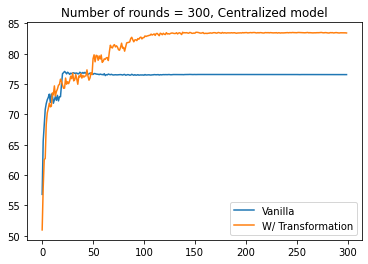

In [114]:
_, E, alpha, accuracies = parseJSON("artifacts/ALPHA_Centralized-Model.json")
_, E1, alpha_1, accuracies_1 = parseJSON("artifacts/ALPHA_Centralized-Model_T.json")

plot(f"Number of rounds = {E}, Centralized model", x, [accuracies, accuracies_1], ["Vanilla", "W/ Transformation"])

## Client class distributions

In [172]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def parse_csv(filename, client_id):
    """Read a CIFAR-10 splits file

    Parameters
    ----------
    filename : str
        path of the .csv file containing the splits

    Returns
    -------
    Tuple[DefaultDict[int, List[int]], Dict[int, int]]
        the dictionary containing the splits as user_id:[image_id]
        and the labels_mapping as image_id:label
    """
    splits = defaultdict(lambda: [])
    labels_mapping = dict()

    with open(filename) as f:
        for line in f:
            if not line[0].isdigit():
                # Skip the first line
                continue

            user_id, image_id, label = (int(token) for token in line.split(","))
            if user_id == client_id:
                splits[user_id].append(image_id)
                labels_mapping[image_id] = label

    return splits, labels_mapping


NUMBER_OF_CLASSES = 10

def heatmap(title, client_ids, client_labels, values):
    _, ax = plt.subplots()
    _ = plt.imshow(values)
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(NUMBER_OF_CLASSES))
    ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
    ax.set_yticks(np.arange(len(client_ids)))
    ax.set_yticklabels(client_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(client_ids)):
        for j in range(NUMBER_OF_CLASSES):
            _ = ax.text(j, i, int(values[i][j]),
                        ha="center", va="center", color="w")

    ax.set_title(title)
    plt.savefig("./plots/" + title + ".jpg", dpi = 150, bbox_inches = 'tight')
    plt.show()

In [173]:
def heatmap_wrapper(alpha):
    _, labels_0 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 0)
    _, labels_10 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 10)
    _, labels_30 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 30)
    _, labels_60 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 60)
    _, labels_90 = parse_csv(f"cifar10/federated_train_alpha_{alpha:.2f}.csv", 90)


    classes_0 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_0.values():
        classes_0[l] += 1
    classes_10 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_10.values():
        classes_10[l] += 1
    classes_30 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_30.values():
        classes_30[l] += 1
    classes_60 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_60.values():
        classes_60[l] += 1
    classes_90 = np.zeros(NUMBER_OF_CLASSES)
    for l in labels_90.values():
        classes_90[l] += 1

    heatmap(f"Client class distribution with alpha = {alpha}", 
        [0, 10, 30, 60, 90], 
        ["0", "10", "30", "60", "90"], 
        [classes_0, classes_10, classes_30, classes_60, classes_90])

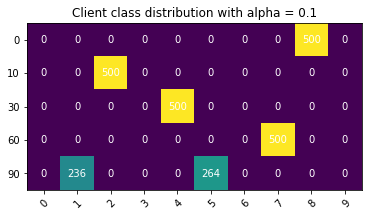

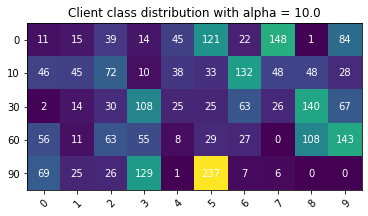

In [174]:
heatmap_wrapper(0.10)
heatmap_wrapper(10.0)

## Tables generation

### Comparison of different normalization layers in FedAvg

In [38]:
dirichlet_alphas = [None, 0, 0.05, 0.1, 0.2, 0.5, 1.0, 10.0, 100.0]
norm_layers_header = ["w/o", "BN", "GN"]
norm_layers = ["", "_BN", "_GN"]
trim_at = 100 # 2500 rounds

print("Table: effect of batch normalization and group normalization\n")
print("Dirichlet\t" + "\t\t".join(norm_layers_header))
for alpha in dirichlet_alphas:
    row_accuracies = []
    for norm in norm_layers:
        if alpha is None:
            _, _, _, accuracies = parseJSON(f"artifacts/IID_E_1_K_5{norm}.json") 
        else:
            _, _, _, accuracies = parseJSON(f"artifacts/ALPHA_{alpha:.1f}_E_1_K_5{norm}.json") 
        
        row_accuracies.append(max(accuracies[:trim_at]))
    print(f"{alpha}\t\t" + "\t\t".join(map(lambda x: f"{x:.2f}", row_accuracies)))

Table: effect of batch normalization and group normalization

Dirichlet	w/o		BN		GN
None		73.04		75.23		75.43
0		41.63		25.89		51.69
0.05		51.12		47.52		57.72
0.1		51.12		47.52		57.72
0.2		53.74		56.33		58.62
0.5		57.61		65.49		66.98
1.0		61.27		68.37		68.91
10.0		70.85		74.48		74.35
100.0		72.78		75.84		75.03
